In [1]:
# show images inline
%matplotlib inline

import sys, os
sys.path.insert(0, os.path.abspath('..'))
import yolk
from PIL import Image

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import numpy as np

Using retinanet backend


In [17]:
from utils.show_bbox_plt import draw_bounding_boxes_on_images

In [18]:
from keras.preprocessing import image as keras_pre_image
from keras_retinanet.utils.image import preprocess_image, resize_image
from scipy.misc import imread
from skimage import io

In [21]:
def main():
    images = []
    preprocess_images = []
    image_path = './000000008021.jpg'
    
    ## load image
    image = yolk.detector.preprocessing_image(image_path)
    images.append(image) 
    
    ## preprocess image
    preprocess_image, scale = yolk.detector.preprocessing_image(image[:, :, ::-1].copy())
    preprocess_images.append(resize_image(preprocess_image))

    ## load model
    model_path = os.path.join('..', 'snapshots', 'resnet50_coco_best_v2.1.0.h5')
    model = yolk.detector.load_model(model_path)

    ## model predict
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(preprocess_image, axis=0))
    
    ## postprocess image
    labels_to_names = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}
    class_info = [labels_to_names[i] for i in range(0, len(labels_to_names.keys()))] 

    results = []
    for idx in range(len(images)):
        results.append([])
        for box, score, label in zip(boxes[idx], scores[idx], labels[idx]): 
            results[idx].append([label + 1, score] + box.tolist()) 
    results = np.array(results)  
    
    ## draw images
    draw_bounding_boxes_on_images(images, results ,class_info, thresold=0.5)


If you see error 'compute_overlap.pyx', you have to install package!

~~~python
python setup.py build_ext --inplace
~~~

tracking <tf.Variable 'Variable_10:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_11:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_12:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_13:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_14:0' shape=(9, 4) dtype=float32> anchors
type: <class 'keras.engine.training.Model'>
72.0
14.819444444444445 11.11111111111111


<Figure size 432x288 with 0 Axes>

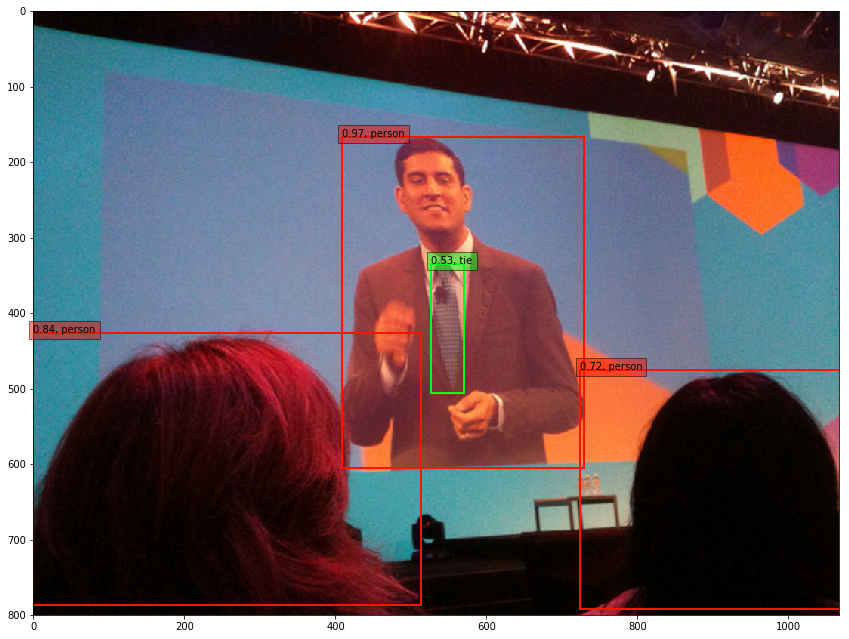

In [20]:
if __name__ == '__main__':
    main()